In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords  # Importing Natural Language Toolkit
from nltk.stem import WordNetLemmatizer

In [2]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\hMASK_INDIA.CSV',header=None,names=["created_at","text","screen_name","location"])
#np.random.seed(0)

In [3]:
df.head(20)

,created_at,text,screen_name,location
0,31-01-2022 15:51,b'100 percent first dose vaccination achieved ...,b'rmulko',"b'Lucknow, India'"
1,31-01-2022 15:50,b'@Yveerangnayen Good health is not something ...,b'SahareYashu',"b'Nagpur, India'"
2,31-01-2022 15:44,b'@Yveerangnayen @NITIAayog To\xc2\xa0insure\x...,b'SahareYashu',"b'Nagpur, India'"
3,31-01-2022 15:31,"b'#COVID19 update. In UP, 6626 new cases and 1...",b'rmulko',"b'Lucknow, India'"
4,31-01-2022 15:24,b'\xf0\x9f\x9a\xa8#Myth: #COVID19 vaccine caus...,b'NITIAayog',"b'New Delhi, India'"
5,31-01-2022 14:47,b'@Yveerangnayen @NITIAayog You are regularly ...,b'AshaJaspal4',"b'Panchkula, India'"
6,31-01-2022 14:44,b'Status of Covid-19 cases 31.01.2022 in #Madu...,b'city_madurai',"b'Madurai, TamilNadu, India'"
7,31-01-2022 14:42,b'@Yveerangnayen Truely yveerangnayen doing be...,b'AshaJaspal4',"b'Panchkula, India'"
8,31-01-2022 14:41,b'With the holy inspiration of Saint Dr Gurmee...,b'OfficialMSGfc',"b'Mumbai, Maharashtra, India'"
9,31-01-2022 14:37,b'@Yveerangnayen #Covid\n#YouthVeerangnayen\n#...,b'AnjaliR81849784',"b'Punjab, India'"


In [4]:
df.shape

(367, 4)

In [5]:

    df['text'] = df['text'].astype(str).str.replace('http\S+|www.\S+', '', case=False)  # Removing URL's from data set
df ['text']= df['text'].str.replace('RT ', '', case=False)  # Removing the phrase 'RT" from all strings
df['text'] = df['text'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
#df['text'] = df['text'].str.replace('[' 'b]','')
#df['text'] = df['text'].str.replace('[x[a-z]]','')
df ['text']= df['text'].str.replace('\r\n', ' ')  # Removing '\r\n' which is present in some strings
df['text'] = df['text'].str.replace('\d+', '').str.lower().str.strip()  # Removing numbers, capitalisation and white space


C:\Users\DELL\AppData\Local\Temp/ipykernel_9524/1243268230.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].astype(str).str.replace('http\S+|www.\S+', '', case=False)  # Removing URL's from data set
C:\Users\DELL\AppData\Local\Temp/ipykernel_9524/1243268230.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
C:\Users\DELL\AppData\Local\Temp/ipykernel_9524/1243268230.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+', '').str.lower().str.strip()  # Removing numbers, capitalisation and white space


In [6]:
df.head(10)

,created_at,text,screen_name,location
0,31-01-2022 15:51,b percent first dose vaccination achieved by ...,b'rmulko',"b'Lucknow, India'"
1,31-01-2022 15:50,b yveerangnayen good health is not something ...,b'SahareYashu',"b'Nagpur, India'"
2,31-01-2022 15:44,b yveerangnayen nitiaayog to xc xainsure xc ...,b'SahareYashu',"b'Nagpur, India'"
3,31-01-2022 15:31,b covid update in up new cases and new de...,b'rmulko',"b'Lucknow, India'"
4,31-01-2022 15:24,b xf xf xa xa myth covid vaccine causes var...,b'NITIAayog',"b'New Delhi, India'"
5,31-01-2022 14:47,b yveerangnayen nitiaayog you are regularly ...,b'AshaJaspal4',"b'Panchkula, India'"
6,31-01-2022 14:44,b status of covid cases in madurai corpor...,b'city_madurai',"b'Madurai, TamilNadu, India'"
7,31-01-2022 14:42,b yveerangnayen truely yveerangnayen doing be...,b'AshaJaspal4',"b'Panchkula, India'"
8,31-01-2022 14:41,b with the holy inspiration of saint dr gurmee...,b'OfficialMSGfc',"b'Mumbai, Maharashtra, India'"
9,31-01-2022 14:37,b yveerangnayen covid n youthveerangnayen n ...,b'AnjaliR81849784',"b'Punjab, India'"


In [7]:
 nltk.download('stopwords')  # Downloading stop words
#stop = set(stopwords.words('english'))  # Selecting English stop words
#df['text'] = df['text'] .apply(lambda x: [item for item in x if item not in stop])  # Removing stop words from each string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
df.shape[0]

367

In [9]:
lemmatizer = WordNetLemmatizer()
for i in range(df.shape[0]):
    words=nltk.word_tokenize(df['text'][i])
    words = [lemmatizer.lemmatize(w, pos='a') for w in words if w not in set(stopwords.words("english")) ]
    df['text'][i]=' '.join(words)

In [10]:
df['text'][10]

'b yveerangnayen nitiaayog great work n awarenesscampaigns n covidappropriatebehaviour n covid n maskup n maskupindia'

In [11]:
df.head(10)

,created_at,text,screen_name,location
0,31-01-2022 15:51,b percent first dose vaccination achieved upgo...,b'rmulko',"b'Lucknow, India'"
1,31-01-2022 15:50,b yveerangnayen good health something buy howe...,b'SahareYashu',"b'Nagpur, India'"
2,31-01-2022 15:44,b yveerangnayen nitiaayog xc xainsure xc xagoo...,b'SahareYashu',"b'Nagpur, India'"
3,31-01-2022 15:31,b covid update new cases new deaths reported l...,b'rmulko',"b'Lucknow, India'"
4,31-01-2022 15:24,b xf xf xa xa myth covid vaccine causes varian...,b'NITIAayog',"b'New Delhi, India'"
5,31-01-2022 14:47,b yveerangnayen nitiaayog regularly spreading ...,b'AshaJaspal4',"b'Panchkula, India'"
6,31-01-2022 14:44,b status covid cases madurai corporation areas...,b'city_madurai',"b'Madurai, TamilNadu, India'"
7,31-01-2022 14:42,b yveerangnayen truely yveerangnayen best serv...,b'AshaJaspal4',"b'Panchkula, India'"
8,31-01-2022 14:41,b holy inspiration saint dr gurmeet ram rahim ...,b'OfficialMSGfc',"b'Mumbai, Maharashtra, India'"
9,31-01-2022 14:37,b yveerangnayen covid n youthveerangnayen n ma...,b'AnjaliR81849784',"b'Punjab, India'"


In [12]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

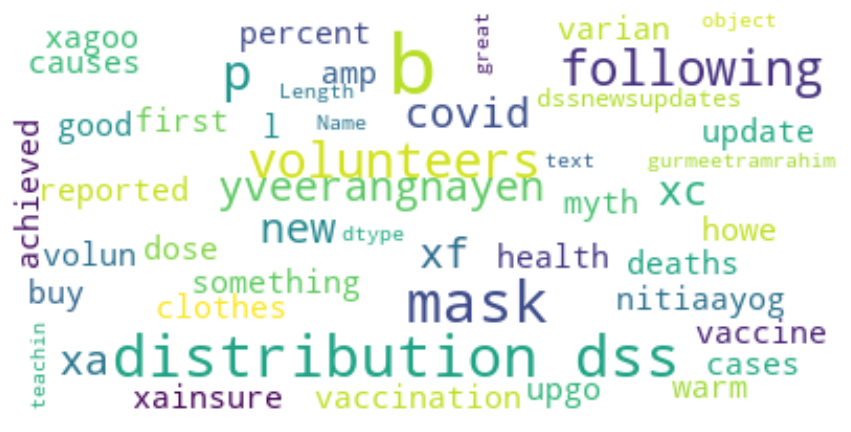

In [13]:
#wordcloud after preprocessing and removing stopwords
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df['text'])

In [14]:
df.shape

(367, 4)

In [15]:
df.isna().sum
tweet=df.copy()

In [16]:
tweet.head()

,created_at,text,screen_name,location
0,31-01-2022 15:51,b percent first dose vaccination achieved upgo...,b'rmulko',"b'Lucknow, India'"
1,31-01-2022 15:50,b yveerangnayen good health something buy howe...,b'SahareYashu',"b'Nagpur, India'"
2,31-01-2022 15:44,b yveerangnayen nitiaayog xc xainsure xc xagoo...,b'SahareYashu',"b'Nagpur, India'"
3,31-01-2022 15:31,b covid update new cases new deaths reported l...,b'rmulko',"b'Lucknow, India'"
4,31-01-2022 15:24,b xf xf xa xa myth covid vaccine causes varian...,b'NITIAayog',"b'New Delhi, India'"


In [17]:
tweet['sentiment'] = ' '
tweet['polarity'] = None
for i,tweets in enumerate(tweet.text) :
    blob = TextBlob(tweets)
    tweet['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet['sentiment'][i] = 'negative'
    else :
        tweet['sentiment'][i] = 'neutral'
tweet.head()

,created_at,text,screen_name,location,sentiment,polarity
0,31-01-2022 15:51,b percent first dose vaccination achieved upgo...,b'rmulko',"b'Lucknow, India'",positive,0.25
1,31-01-2022 15:50,b yveerangnayen good health something buy howe...,b'SahareYashu',"b'Nagpur, India'",positive,0.2875
2,31-01-2022 15:44,b yveerangnayen nitiaayog xc xainsure xc xagoo...,b'SahareYashu',"b'Nagpur, India'",positive,0.178788
3,31-01-2022 15:31,b covid update new cases new deaths reported l...,b'rmulko',"b'Lucknow, India'",positive,0.136364
4,31-01-2022 15:24,b xf xf xa xa myth covid vaccine causes varian...,b'NITIAayog',"b'New Delhi, India'",neutral,0.0


In [18]:
tweet['sentiment'].value_counts()

neutral     194
positive    158
negative     15
Name: sentiment, dtype: int64

In [19]:
sentiment_df = pd.DataFrame(tweet, columns=[ "text","polarity","sentiment"])

sentiment_df.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA pol sent.csv")


sentiment_df.head(10)

,text,polarity,sentiment
0,b percent first dose vaccination achieved upgo...,0.25,positive
1,b yveerangnayen good health something buy howe...,0.2875,positive
2,b yveerangnayen nitiaayog xc xainsure xc xagoo...,0.178788,positive
3,b covid update new cases new deaths reported l...,0.136364,positive
4,b xf xf xa xa myth covid vaccine causes varian...,0.0,neutral
5,b yveerangnayen nitiaayog regularly spreading ...,0.0,neutral
6,b status covid cases madurai corporation areas...,0.0,neutral
7,b yveerangnayen truely yveerangnayen best serv...,0.675,positive
8,b holy inspiration saint dr gurmeet ram rahim ...,0.0,neutral
9,b yveerangnayen covid n youthveerangnayen n ma...,0.0,neutral


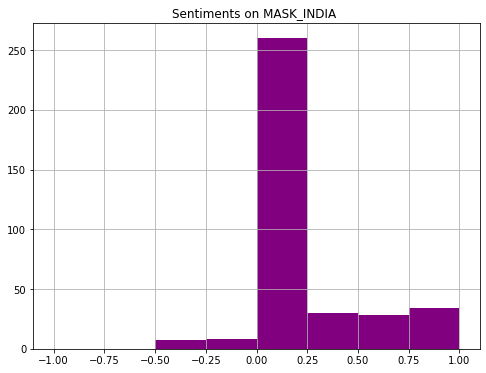

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
tweet['polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments on MASK_INDIA ")
plt.show()

In [21]:
#feature extraction(only feature)
y=tweet['sentiment'].values
y.shape

(367,)

In [22]:
x=tweet['text'].values
x.shape

(367,)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
y_test.shape

(293,)
(293,)
(74,)


(74,)

neutral     194
positive    158
negative     15
Name: sentiment, dtype: int64


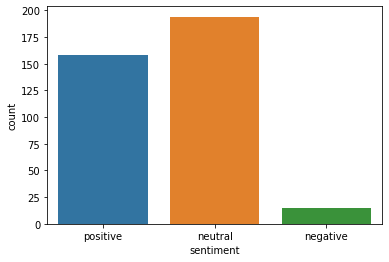

In [25]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);

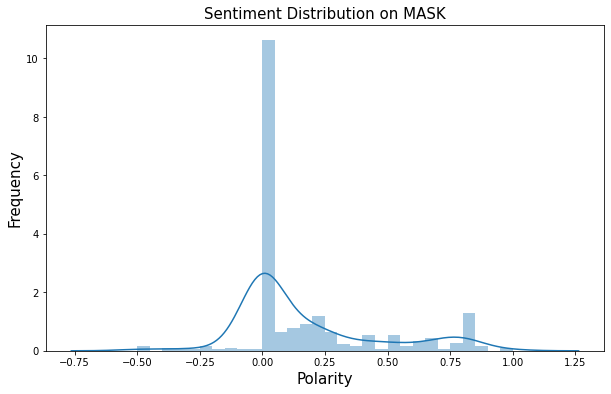

In [26]:
plt.figure(figsize=(10,6))
sns.distplot(tweet['polarity'], bins=30)
plt.title('Sentiment Distribution on MASK',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

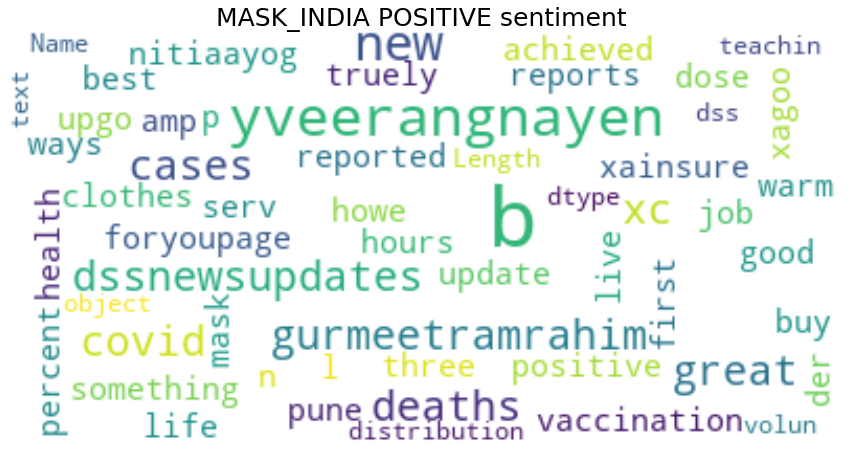

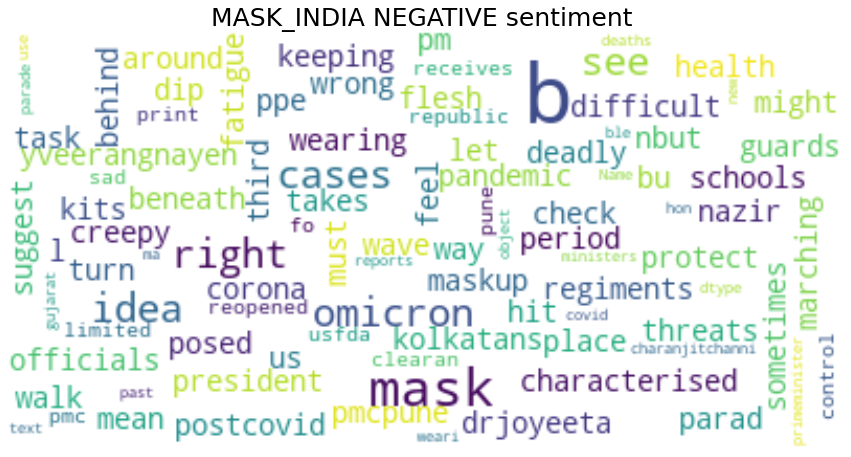

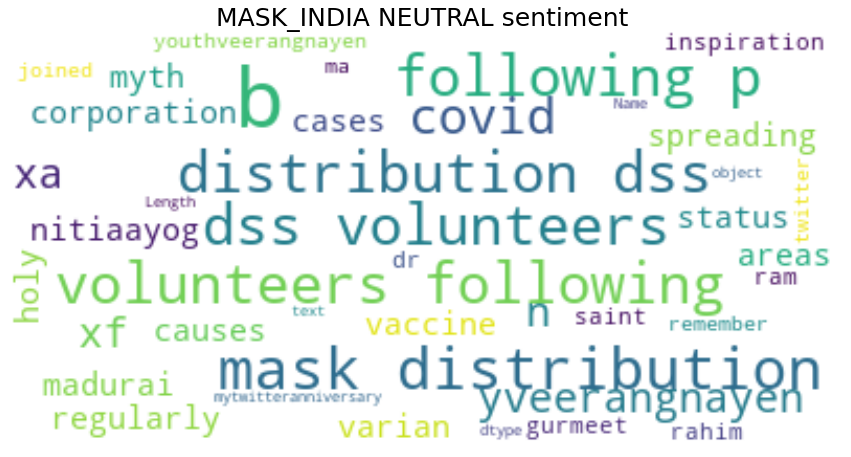

In [27]:
#wordcount with sentiment
pos = tweet['text'][tweet['sentiment'] == 'positive']
show_wordcloud(pos , 'MASK_INDIA POSITIVE sentiment ')

neg = tweet['text'][tweet['sentiment'] == 'negative']
show_wordcloud(neg , 'MASK_INDIA NEGATIVE sentiment ')

neutral = tweet['text'][tweet['sentiment'] == 'neutral']
show_wordcloud(neutral , 'MASK_INDIA NEUTRAL sentiment ')

In [28]:
count = pd.DataFrame(tweet.groupby('sentiment').sum())
count

,created_at,text,screen_name,location,polarity
sentiment,,,,,
negative,31-01-2022 11:3829-01-2022 08:0028-01-2022 12:...,b omicron posed threats us must protect deadly...,b'RajasthanReveal'b'TT_My_Kolkata'b'jayacousti...,"b'Jaipur, India'b'Kolkata, India'b'India'b'Ind...",-4.079437
neutral,31-01-2022 15:2431-01-2022 14:4731-01-2022 14:...,b xf xf xa xa myth covid vaccine causes varian...,b'NITIAayog'b'AshaJaspal4'b'city_madurai'b'Off...,"b'New Delhi, India'b'Panchkula, India'b'Madura...",0.000000
positive,31-01-2022 15:5131-01-2022 15:5031-01-2022 15:...,b percent first dose vaccination achieved upgo...,b'rmulko'b'SahareYashu'b'SahareYashu'b'rmulko'...,"b'Lucknow, India'b'Nagpur, India'b'Nagpur, Ind...",65.929639


In [29]:
words = []
words = [word for i in tweet.text for word in i.split()]

In [30]:
words

['b',
 'percent',
 'first',
 'dose',
 'vaccination',
 'achieved',
 'upgovt',
 'today',
 'n',
 'n',
 'covid',
 'covid',
 'covid_',
 'maskup',
 'masks',
 'b',
 'yveerangnayen',
 'good',
 'health',
 'something',
 'buy',
 'however',
 'extremely',
 'valuable',
 'savings',
 'account',
 'xe',
 'x',
 'xa',
 'b',
 'yveerangnayen',
 'nitiaayog',
 'xc',
 'xainsure',
 'xc',
 'xagood',
 'health',
 'eat',
 'lightly',
 'breathe',
 'deeply',
 'live',
 'moderately',
 'exercise',
 'cultivate',
 'xe',
 'x',
 'xa',
 'b',
 'covid',
 'update',
 'new',
 'cases',
 'new',
 'deaths',
 'reported',
 'lucknow',
 'reported',
 'cases',
 'jhansi',
 'noida',
 'xe',
 'x',
 'xa',
 'b',
 'xf',
 'xf',
 'xa',
 'xa',
 'myth',
 'covid',
 'vaccine',
 'causes',
 'variants',
 'n',
 'n',
 'xf',
 'xf',
 'x',
 'x',
 'focus',
 'fact',
 'covid',
 'vaccine',
 'create',
 'cause',
 'variants',
 'xe',
 'x',
 'xa',
 'b',
 'yveerangnayen',
 'nitiaayog',
 'regularly',
 'spreading',
 'awareness',
 'weldone',
 'corona',
 'n',
 'youthveerangn

In [31]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head(20)

,word,frequency
0,n,467
1,x,417
2,b,369
3,xe,352
4,xa,340
5,xf,215
6,covid,149
7,mask,103
8,maskup,85
9,yveerangnayen,79


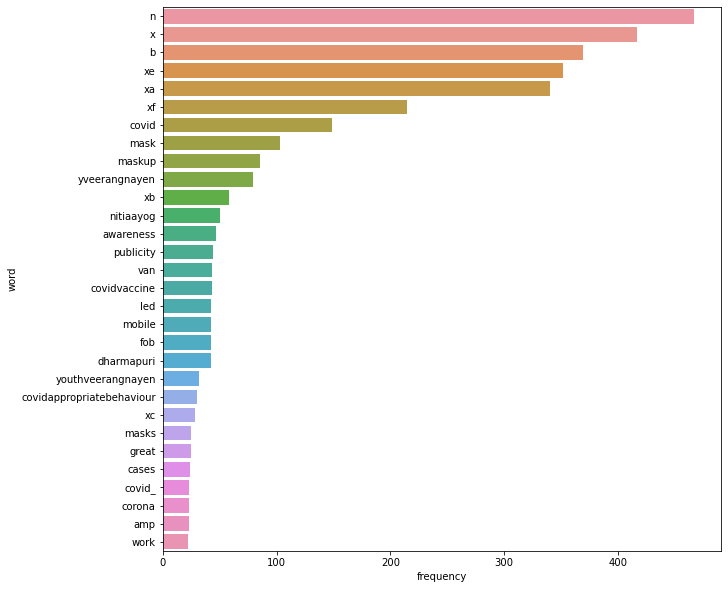

In [32]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);

In [33]:
tweet.to_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_Final_sent_analysis.csv',index=False)

In [34]:
sentiment_df.head()

,text,polarity,sentiment
0,b percent first dose vaccination achieved upgo...,0.25,positive
1,b yveerangnayen good health something buy howe...,0.2875,positive
2,b yveerangnayen nitiaayog xc xainsure xc xagoo...,0.178788,positive
3,b covid update new cases new deaths reported l...,0.136364,positive
4,b xf xf xa xa myth covid vaccine causes varian...,0.0,neutral


In [35]:
sentiment_df.describe()

,text,polarity,sentiment
count,367,367.0,367
unique,319,70.0,3
top,b middaylifestyle n n masks still save lives t...,0.0,neutral
freq,7,194.0,194


In [36]:
sentiment_df.groupby('sentiment').size()

sentiment
negative     15
neutral     194
positive    158
dtype: int64

In [37]:
print(sentiment_df.groupby('polarity').size())

polarity
-0.500000     3
-0.400000     2
-0.312500     1
-0.271429     1
-0.250000     2
             ..
 0.733333     1
 0.750000     5
 0.800000    24
 0.900000     3
 1.000000     2
Length: 70, dtype: int64


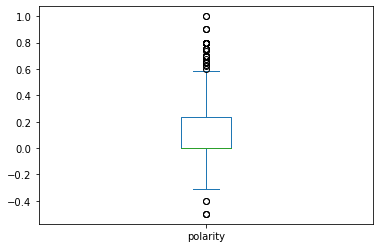

In [38]:
import matplotlib.pyplot as plt
sentiment_df.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()

In [39]:
clo=['sentiment','polarity','text']
dataset2=sentiment_df.reindex(columns=clo)
#dataset2.head()
dataset2[:10]

,sentiment,polarity,text
0,positive,0.25,b percent first dose vaccination achieved upgo...
1,positive,0.2875,b yveerangnayen good health something buy howe...
2,positive,0.178788,b yveerangnayen nitiaayog xc xainsure xc xagoo...
3,positive,0.136364,b covid update new cases new deaths reported l...
4,neutral,0.0,b xf xf xa xa myth covid vaccine causes varian...
5,neutral,0.0,b yveerangnayen nitiaayog regularly spreading ...
6,neutral,0.0,b status covid cases madurai corporation areas...
7,positive,0.675,b yveerangnayen truely yveerangnayen best serv...
8,neutral,0.0,b holy inspiration saint dr gurmeet ram rahim ...
9,neutral,0.0,b yveerangnayen covid n youthveerangnayen n ma...


In [40]:
dataset2.describe()#dataset2.hist()
#plt.show()

,sentiment,polarity,text
count,367,367.0,367
unique,3,70.0,319
top,neutral,0.0,b middaylifestyle n n masks still save lives t...
freq,194,194.0,7


In [41]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'text'})

In [42]:
df1.head()

,text
0,b behind mask flesh beneath mask idea ideas bu...
1,b omicroninindia children years age may wear m...
2,b yveerangnayen nitiaayog vaccinationcamps n a...
3,b things stato open another new strain variant...
4,b hand sanitizer dispenser n nmpg hardware nca...


In [43]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [44]:
df_train.head()

,text,sentiment
0,b behind mask flesh beneath mask idea ideas bu...,negative
1,b omicroninindia children years age may wear m...,neutral
2,b yveerangnayen nitiaayog vaccinationcamps n a...,neutral
3,b things stato open another new strain variant...,positive
4,b hand sanitizer dispenser n nmpg hardware nca...,neutral


In [45]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'text'})

In [46]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [47]:
df_test.head()

,text,sentiment
0,b find mask xf xf x xb fits face ensure gaps m...,negative
1,b xf xf xa xa myth covid vaccine causes varian...,neutral
2,b enforcement update last hrs dtd rayagadapoli...,neutral
3,b jdhankhar ecisveep dadu wear mask everything...,positive
4,b derasachasauda volunteers panchkula haryana ...,neutral


In [48]:
import string
string.punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [49]:
#storing the puntuation free text in a new column called clean_msg
df_train['text']= df_train['text'].apply(lambda x:remove_punctuation(x))
df_test['text']= df_test['text'].apply(lambda x:remove_punctuation(x))

In [50]:
df_train.head()
#punctuations are removed from news column in train dataset

,text,sentiment
0,b behind mask flesh beneath mask idea ideas bu...,negative
1,b omicroninindia children years age may wear m...,neutral
2,b yveerangnayen nitiaayog vaccinationcamps n a...,neutral
3,b things stato open another new strain variant...,positive
4,b hand sanitizer dispenser n nmpg hardware nca...,neutral


In [51]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [53]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [54]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['b', 'things', 'stato', 'open', 'another', 'new', 'strain', 'variant', 'neocov', 'covid', 'high', 'spread', 'high', 'death', 'rate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'good', 'job', 'xf', 'xf', 'x', 'xd', 'awarenesscampaigns', 'n', 'covidappropriatebehaviour', 'n', 'covid', 'n', 'maskup', 'n', 'maskupindia']
Sentence after removing stopwords: ['b', 'fight', 'coronavirus', 'keep', 'maintaining', 'social', 'distance', 'nbe', 'aware', 'careful', 'strong', 'n', 'n', 'corona', 'virus', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'three', 'doses', 'covid', 'vaccine', 'still', 'somehow', 'managed', 'become', 'positive', 'experienced', 'myalgia', 'like', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'xe', 'x', 'xs', 'great', 'work', 'done', 'youthveerangnayen', 'wearing', 'mask', 'beneficial', 'way', 'protect', 'xe', 'x', 'xa']
Sentence after removing sto

Sentence after removing stopwords: ['b', 'covid', 'update', 'new', 'cases', 'new', 'deaths', 'reported', 'lucknow', 'reported', 'cases', 'jhansi', 'noida', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'congratulations', 'everyone', 'made', 'furball', 'raging', 'success', 'n', 'n', 'mask', 'querade', 'protectpurdue', 'maskson', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xan', 'important', 'alert', 'misled', 'someone', 'says', 'omicron', 'another', 'viral', 'fever', 'remember', 'stil', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dyk', 'according', 'cdc', 'essential', 'wear', 'mask', 'correctly', 'ensure', 'get', 'full', 'protection', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'covid', 'n', 'covidappropriatebehaviour', 'n', 'covid', 'n', 'maskup', 'n', 'maskupindia', 'n', 'youthveerangnayen', 'nwe', 'proud', 'india']
Sentence after removing stopwords: ['b', 'mind', 'agitated', 'even', 'need', 'cal

Sentence after removing stopwords: ['b', 'enforcement', 'update', 'last', 'hrs', 'dtd', 'rayagadapolice', 'collected', 'rs', 'fine', 'traffic', 'defa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'enforcement', 'update', 'last', 'hrs', 'dtd', 'rayagadapolice', 'collected', 'rs', 'fine', 'traffic', 'default', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'country', 'republic', 'citizens', 'supreme', 'power', 'elect', 'someone', 'take', 'best', 'deci', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'enforcement', 'update', 'last', 'hrs', 'dtd', 'rayagadapolice', 'collected', 'rs', 'fine', 'traffic', 'default', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gujarat', 'amc', 'identifies', 'new', 'containment', 'zones', 'city', 'n', 'n', 'containmentzone', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'superb', 'work', 'xf', 'xf', 'x', 'xc', 'n', 'corona', 'n', 'youthveerangnayen', 'n', 'covidappr

In [55]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['b', 'behind', 'mask', 'flesh', 'beneath', 'mask', 'idea', 'ideas', 'bulletproof', 'n', 'nche', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pm', 'maskup', 'president', 'marching', 'regiments', 'parade', 'participants', 'republicdayparade']
Sentence after removing stopwords: ['b', 'pmcpune', 'suggest', 'schools', 'reopened', 'pune', 'pmc', 'form', 'flying', 'squads', 'randomly', 'check', 'observance', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'posed', 'threats', 'us', 'must', 'protect', 'deadly', 'viruses', 'mask', 'ra', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sad', 'see', 'republic', 'charanjitchanni', 'also', 'use', 'mask', 'rahulgandhi', 'fact', 'percent', 'fol', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sometimes', 'takes', 'wrong', 'turn', 'get', 'right', 'place', 'afraid', 'one', 'fait', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'control', 'print', 'lim

In [56]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['b', 'omicroninindia', 'children', 'years', 'age', 'may', 'wear', 'mask', 'depending', 'ability', 'know', 'wear', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'vaccinationcamps', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', 'n', 'covid', 'n', 'vaccinationcamp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hand', 'sanitizer', 'dispenser', 'n', 'nmpg', 'hardware', 'ncall', 'us', 'n', 'kitchen', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sudhirmehtapune', 'suggest', 'whereever', 'schools', 'reopened', 'local', 'state', 'administration', 'form', 'flying', 'squads', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'awarenesscampaigns', 'n', 'covidappropriatebehaviour', 'n', 'covid', 'n', 'maskup', 'n', 'maskupindia', 'ncovid', 'vaccin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 

Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'regularly', 'spreading', 'awareness', 'weldone', 'corona', 'n', 'youthveerangnayen', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jb', 'tip', 'day', 'n', 'n', 'expertsinsight', 'n', 'nmake', 'smamove', 'n', 'jbinfragroup', 'n', 'staysafestayhome', 'n', 'wearamask', 'n', 'n', 'n', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'youthveerangnayen', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', 'n', 'covid', 'n', 'getvaccinated', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'going', 'work', 'nremember', 'task', 'n', 'jodhpur', 'police', 'mask', 'sanitizer', 'socialdistancing', 'n', 'covid', 'coronavirus']
Sentence after removing stopwords: ['b', 'days', 'home', 'taking', 'medicines', 'tari', 'pan', 'sala', 'kalat', 'nahi', 'corona', 'aahe', 'ka', 'gelay', 'mazyatn', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'n', 

Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'vaccinationcamps', 'organized', 'people', 'save', 'lives', 'everyone', 'aro', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'safetravels', 'n', 'wearamask', 'properly', 'xf', 'xf', 'x', 'xb', 'n', 'washyourhands', 'n', 'covidappropriatebehaviour', 'n', 'covidsafeoperation', 'n', 'aairedwr']
Sentence after removing stopwords: ['b', 'mask', 'distribution', 'dss', 'volunteers', 'following', 'pious', 'teachings', 'saint', 'dr', 'gurmeetramrahim', 'singh', 'ji', 'insan', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'status', 'covid', 'cases', 'madurai', 'corporation', 'areas', 'n', 'covid', 'maskup', 'maduraicity']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'corona', 'n', 'medical', 'help', 'youthveerangnayen', 'n', 'covid', 'n', 'covidappropriatebehaviour', 'n', 'indiafightscovid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nft', 'want', 'f', 'cking', 'transmissio

In [57]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [58]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_unigrampositive.csv",mode='w',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_unigramnegative.csv",mode='w',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_unigramneutral.csv",mode='w',index=False,header=False)

In [59]:
df_positive.shape

(634, 2)

In [60]:
df_negative.shape

(117, 2)

In [61]:
df_neutral.shape

(686, 2)

In [62]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_unigram_combine.csv",mode='a',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_unigram_combine.csv",mode='a',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_unigram_combine.csv",mode='a',index=False,header=False)

In [63]:
df3=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_unigram_combine.csv",header=None,names=["unigram","repetation"])
#np.random.seed(0))
df3.head()

,unigram,repetation
0,unigram,repetation
1,unigram,repetation
2,x,210
3,xe,168
4,xa,158


In [64]:
df3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_unigram_combine.csv",index=False)

In [65]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [66]:
df3.shape

(4875, 2)

In [67]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [68]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

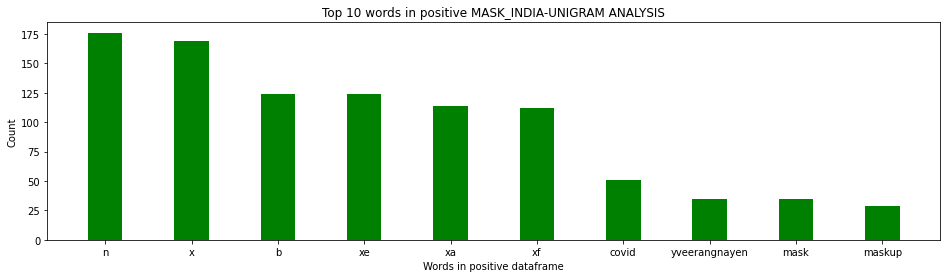

In [69]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive MASK_INDIA-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

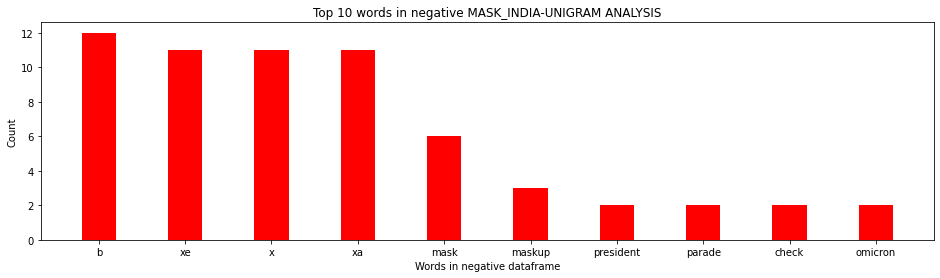

In [70]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative MASK_INDIA-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

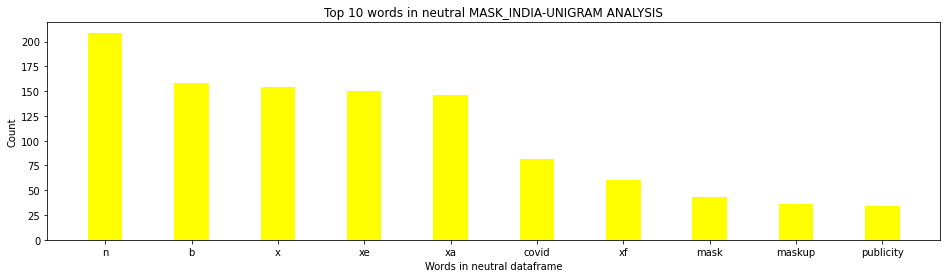

In [71]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral MASK_INDIA-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [72]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [73]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['b', 'things', 'stato', 'open', 'another', 'new', 'strain', 'variant', 'neocov', 'covid', 'high', 'spread', 'high', 'death', 'rate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'good', 'job', 'xf', 'xf', 'x', 'xd', 'awarenesscampaigns', 'n', 'covidappropriatebehaviour', 'n', 'covid', 'n', 'maskup', 'n', 'maskupindia']
Sentence after removing stopwords: ['b', 'fight', 'coronavirus', 'keep', 'maintaining', 'social', 'distance', 'nbe', 'aware', 'careful', 'strong', 'n', 'n', 'corona', 'virus', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'three', 'doses', 'covid', 'vaccine', 'still', 'somehow', 'managed', 'become', 'positive', 'experienced', 'myalgia', 'like', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'xe', 'x', 'xs', 'great', 'work', 'done', 'youthveerangnayen', 'wearing', 'mask', 'beneficial', 'way', 'protect', 'xe', 'x', 'xa']
Sentence after removing sto

Sentence after removing stopwords: ['b', 'omicron', 'scare', 'cloth', 'mask', 'good', 'enough', 'keep', 'covid', 'bay', 'n', 'n']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'youth', 'veerangnayen', 'playing', 'great', 'role', 'defeat', 'covid', 'weldone', 'vaccinationcamps', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'great', 'work', 'youth', 'veerangnayen', 'xf', 'xf', 'x', 'xc', 'youthveerangnayen', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'great', 'work', 'corona', 'n', 'youthveerangnayen', 'n', 'covidappropriatebehaviour', 'n', 'vaccinated', 'n', 'maskup', 'n', 'maskupindia', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'update', 'new', 'cases', 'new', 'deaths', 'reported', 'lucknow', 'reported', 'cases', 'jhansi', 'noida', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'congratulations', 'everyone'

Sentence after removing stopwords: ['b', 'yveerangnayen', 'great', 'job', 'done', 'youth', 'veerangnayen', 'pandemic', 'salute', 'youth', 'veerangnayen', 'xf', 'xf', 'x', 'xf', 'xf', 'xf', 'xf', 'xbb', 'xf', 'xf', 'x', 'xf', 'xf', 'xf', 'xf', 'xbb', 'xf', 'xf', 'x', 'xd', 'xf', 'xf', 'xf', 'xbb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'every', 'living', 'cell', 'body', 'made', 'food', 'eat', 'consistently', 'eat', 'junk', 'food', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'enforcement', 'update', 'last', 'hrs', 'dtd', 'rayagadapolice', 'collected', 'rs', 'fine', 'traffic', 'defa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'enforcement', 'update', 'last', 'hrs', 'dtd', 'rayagadapolice', 'collected', 'rs', 'fine', 'traffic', 'default', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'country', 'republic', 'citizens', 'supreme', 'power', 'elect', 'someone', 'take', 'best', 'deci', 'xe', 'x', 'xa'

In [74]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

Sentence after removing stopwords: ['b', 'behind', 'mask', 'flesh', 'beneath', 'mask', 'idea', 'ideas', 'bulletproof', 'n', 'nche', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pm', 'maskup', 'president', 'marching', 'regiments', 'parade', 'participants', 'republicdayparade']
Sentence after removing stopwords: ['b', 'pmcpune', 'suggest', 'schools', 'reopened', 'pune', 'pmc', 'form', 'flying', 'squads', 'randomly', 'check', 'observance', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'posed', 'threats', 'us', 'must', 'protect', 'deadly', 'viruses', 'mask', 'ra', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sad', 'see', 'republic', 'charanjitchanni', 'also', 'use', 'mask', 'rahulgandhi', 'fact', 'percent', 'fol', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sometimes', 'takes', 'wrong', 'turn', 'get', 'right', 'place', 'afraid', 'one', 'fait', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'control', 'print', 'lim

In [75]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['b', 'omicroninindia', 'children', 'years', 'age', 'may', 'wear', 'mask', 'depending', 'ability', 'know', 'wear', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'vaccinationcamps', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', 'n', 'covid', 'n', 'vaccinationcamp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hand', 'sanitizer', 'dispenser', 'n', 'nmpg', 'hardware', 'ncall', 'us', 'n', 'kitchen', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sudhirmehtapune', 'suggest', 'whereever', 'schools', 'reopened', 'local', 'state', 'administration', 'form', 'flying', 'squads', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'awarenesscampaigns', 'n', 'covidappropriatebehaviour', 'n', 'covid', 'n', 'maskup', 'n', 'maskupindia', 'ncovid', 'vaccin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 

Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'awarenesscampaigns', 'n', 'covidappropriatebehaviour', 'n', 'covid', 'n', 'maskup', 'n', 'maskupindia', 'ngreat', 'humanity', 'work', 'xf', 'xf', 'x', 'xd']
Sentence after removing stopwords: ['b', 'agree', 'traffic', 'indiagate', 'cause', 'respiratory', 'problems', 'provided', 'mask', 'atleast', 'b', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sambitswaraj', 'followed', 'protocol', 'mask', 'removed', 'time', 'lunger', 'mr', 'patra', 'called', 'doctor', 'sp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dssnewsupdates', 'gurmeetramrahim', 'well', 'done', 'sadh', 'sangat', 'ji', 'dera', 'sacha', 'sauda', 'followers', 'creating', 'example', 'soc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'kamaraj', 'nagar', 'hosur', 'krishn', 'xe', 'x', 'xa']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['b', 'keep', 'eye', 'symptoms', 'get', 'medical', 'advice', 'needed', 'n', 'maskup', 'socialdistancing', 'getvaccinatednow', 'xe', 'xa', 'xaa', 'xe', 'xa', 'x', 'xe', 'xa', 'xa', 'xe', 'xa', 'x']
Sentence after removing stopwords: ['b', 'decision', 'reopening', 'mp', 'schools', 'taken', 'consulting', 'experts', 'cm', 'shivrajsinghchouhan', 'n', 'madhyapradesh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'face', 'id', 'work', 'mask', 'nios', 'update', 'n', 'ios', 'faceid', 'iphone', 'ios', 'mask']
Sentence after removing stopwords: ['b', 'middaylifestyle', 'n', 'n', 'masks', 'still', 'save', 'lives', 'thirdwave', 'begins', 'guide', 'maskup', 'n', 'nvia', 'nascim', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'vaccinationcamps', 'organized', 'people', 'save', 'lives', 'everyone', 'aro', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'safetravels', 'n', 'wearamask', 'properly', 'xf', '

In [76]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

 

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [77]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_bigrampositive.csv",mode='w',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_bigramnegative.csv",mode='w',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_bigramneutral.csv",mode='w',index=False,header=False)

In [78]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_bigram_combine.csv",mode='a',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_bigram_combine.csv",mode='a',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_bigram_combine.csv",mode='a',index=False,header=False)

In [79]:
df4=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_bigram_combine.csv",header=None,names=["bigram","repetation"])
#np.random.seed(df4.head(20)0))

df4.shape

(7280, 2)

In [80]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

 

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

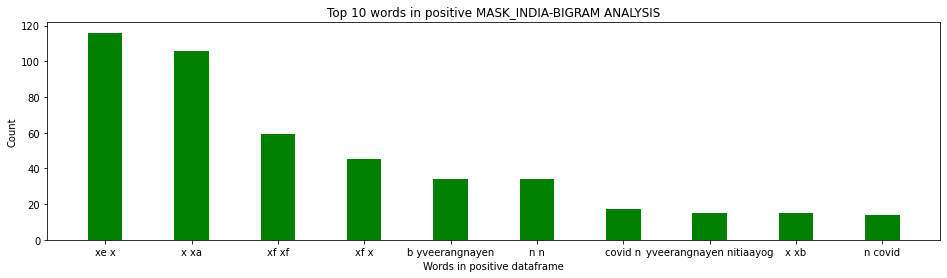

In [81]:
plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)

plt.xlabel("Words in positive dataframe")

plt.ylabel("Count")

plt.title("Top 10 words in positive MASK_INDIA-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()

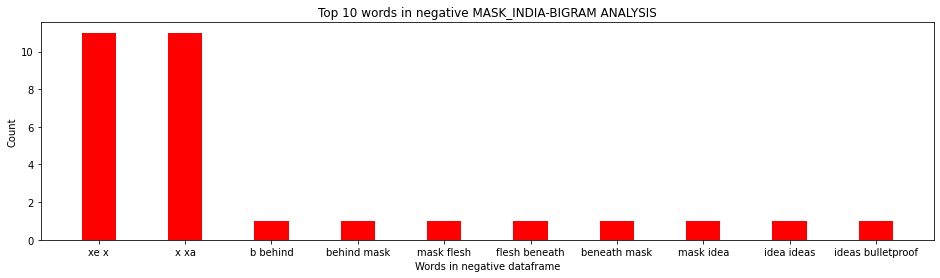

In [82]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative MASK_INDIA-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

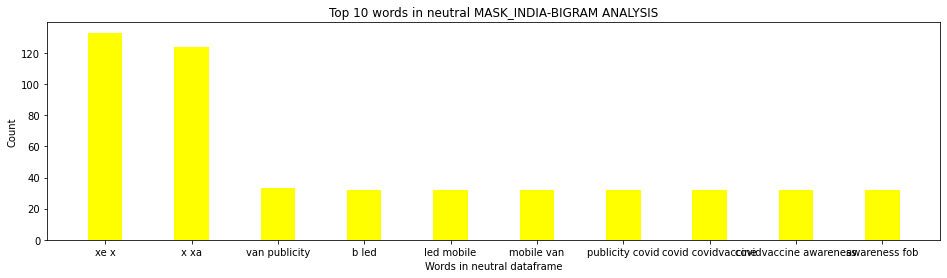

In [83]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral MASK_INDIA-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

#top 10 bigram neutral | n-grams


In [84]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['b', 'things', 'stato', 'open', 'another', 'new', 'strain', 'variant', 'neocov', 'covid', 'high', 'spread', 'high', 'death', 'rate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'good', 'job', 'xf', 'xf', 'x', 'xd', 'awarenesscampaigns', 'n', 'covidappropriatebehaviour', 'n', 'covid', 'n', 'maskup', 'n', 'maskupindia']
Sentence after removing stopwords: ['b', 'fight', 'coronavirus', 'keep', 'maintaining', 'social', 'distance', 'nbe', 'aware', 'careful', 'strong', 'n', 'n', 'corona', 'virus', 'mask', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'three', 'doses', 'covid', 'vaccine', 'still', 'somehow', 'managed', 'become', 'positive', 'experienced', 'myalgia', 'like', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'xe', 'x', 'xs', 'great', 'work', 'done', 'youthveerangnayen', 'wearing', 'mask', 'beneficial', 'way', 'protect', 'xe', 'x', 'xa']
Sentence after removing sto

Sentence after removing stopwords: ['b', 'mind', 'agitated', 'even', 'need', 'calm', 'body', 'sit', 'quietly', 'deep', 'breathe', 'find', 'bod', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'join', 'maskup', 'tiki', 'n', 'ndownload', 'tiki', 'app', 'enjoy', 'content', 'everyday', 'xf', 'xf', 'xe', 'xa', 'xf', 'xf', 'x', 'x', 'ngoogle', 'play', 'link']
Sentence after removing stopwords: ['b', 'get', 'boosterdose', 'njust', 'one', 'year', 'first', 'dose', 'got', 'rd', 'booster', 'today', 'nlucky', 'still', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'god', 'balances', 'lives', 'giving', 'us', 'enough', 'blessings', 'keep', 'us', 'happy', 'enough', 'burdens', 'keep', 'us', 'humble', 'enough', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'indiafightscorona', 'rajasthan', 'nth', 'jan', 'covid', 'pm', 'bulletin', 'n', 'nplz', 'keep', 'maskup', 'xf', 'xf', 'x', 'xb', 'amp', 'staysafe', 'n', 'n', 'positive', 'case', 'xe', 'x', 'xa']
Sentence after r

Sentence after removing stopwords: ['b', 'yveerangnayen', 'every', 'living', 'cell', 'body', 'made', 'food', 'eat', 'consistently', 'eat', 'junk', 'food', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'enforcement', 'update', 'last', 'hrs', 'dtd', 'rayagadapolice', 'collected', 'rs', 'fine', 'traffic', 'defa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'enforcement', 'update', 'last', 'hrs', 'dtd', 'rayagadapolice', 'collected', 'rs', 'fine', 'traffic', 'default', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'country', 'republic', 'citizens', 'supreme', 'power', 'elect', 'someone', 'take', 'best', 'deci', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'enforcement', 'update', 'last', 'hrs', 'dtd', 'rayagadapolice', 'collected', 'rs', 'fine', 'traffic', 'default', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gujarat', 'amc', 'identifies', 'new', 'containment', 'zones', 'city', 'n', 'n', 'containmentzone', 

In [85]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['b', 'behind', 'mask', 'flesh', 'beneath', 'mask', 'idea', 'ideas', 'bulletproof', 'n', 'nche', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pm', 'maskup', 'president', 'marching', 'regiments', 'parade', 'participants', 'republicdayparade']
Sentence after removing stopwords: ['b', 'pmcpune', 'suggest', 'schools', 'reopened', 'pune', 'pmc', 'form', 'flying', 'squads', 'randomly', 'check', 'observance', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'posed', 'threats', 'us', 'must', 'protect', 'deadly', 'viruses', 'mask', 'ra', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sad', 'see', 'republic', 'charanjitchanni', 'also', 'use', 'mask', 'rahulgandhi', 'fact', 'percent', 'fol', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sometimes', 'takes', 'wrong', 'turn', 'get', 'right', 'place', 'afraid', 'one', 'fait', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'control', 'print', 'lim

In [86]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['b', 'omicroninindia', 'children', 'years', 'age', 'may', 'wear', 'mask', 'depending', 'ability', 'know', 'wear', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'vaccinationcamps', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', 'n', 'covid', 'n', 'vaccinationcamp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hand', 'sanitizer', 'dispenser', 'n', 'nmpg', 'hardware', 'ncall', 'us', 'n', 'kitchen', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sudhirmehtapune', 'suggest', 'whereever', 'schools', 'reopened', 'local', 'state', 'administration', 'form', 'flying', 'squads', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'awarenesscampaigns', 'n', 'covidappropriatebehaviour', 'n', 'covid', 'n', 'maskup', 'n', 'maskupindia', 'ncovid', 'vaccin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 

Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'brg', 'madepalli', 'bargur', 'krishn', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'video', 'testimonial', 'passenger', 'arrived', 'coimbatoreairpofrom', 'sharjah', 'received', 'appreciations', 'overall', 'arran', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mask', 'distribution', 'dss', 'volunteers', 'following', 'pious', 'teachings', 'saint', 'dr', 'gurmeetramrahim', 'singh', 'ji', 'insan', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covidawareness', 'campaign', 'shieldup', 'kicks', 'banka', 'bihar', 'godda', 'amp', 'pakur', 'jharkhand', 'districts', 'wil', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'order', 'wb', 'govt', 'n', 'schoolreopen', 'collegereopen', 'covidprotocols', 'maskup', 'socialdistanceing']
Sentence after removing stopwords: ['b', 'mask', 'mr', 'prime', 'minister', 'never', 

Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'vaccinationcamps', 'n', 'awarenesscampaigns', 'n', 'nitiaayog', 'n', 'covid', 'n', 'vaccinationcamp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'police', 'termed', 'allegations', 'baseless', 'saying', 'bowler', 'sustained', 'injuries', 'attempt', 'brin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'article', 'published', 'manasoli', 'malai', 'times', 'via', 'youtube', 'n', 'n', 'pmo', 'mask', 'reliance', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'everyone', 'wearing', 'mask', 'except', 'one', 'man', 'n', 'n', 'maskup', 'republicday']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'surya', 'nagar', 'hosur', 'krishnagi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'tamilnadu'

Sentence after removing stopwords: ['b', 'check', 'kolkatans', 'think', 'pandemic', 'masks', 'covidprotocol', 'masks', 'maskup', 'maskupkolkata', 'xe', 'x', 'xa']


In [87]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [88]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_trigram_positive.csv",mode='w',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_trigram_negative.csv",mode='w',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_trigram_neutral.csv",mode='w',index=False,header=False)

In [89]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_trigram_combine.csv",mode='a',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_trigram_combine.csv",mode='a',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_trigram_combine.csv",mode='a',index=False,header=False)

In [90]:
df5=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\mask\MASK RESULTS\MASK_INDIA_trigram_combine.csv",header=None,names=["trigram","repetation"])
#np.random.seed(0))
#df5.head(20)
df5.shape

(8291, 2)

In [91]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [92]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

In [93]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

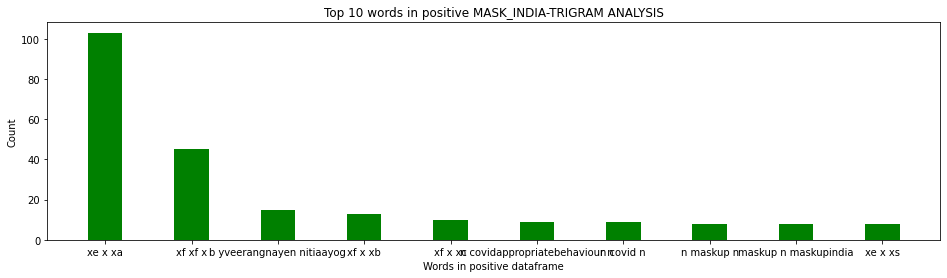

In [94]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive MASK_INDIA-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")

plt.show()

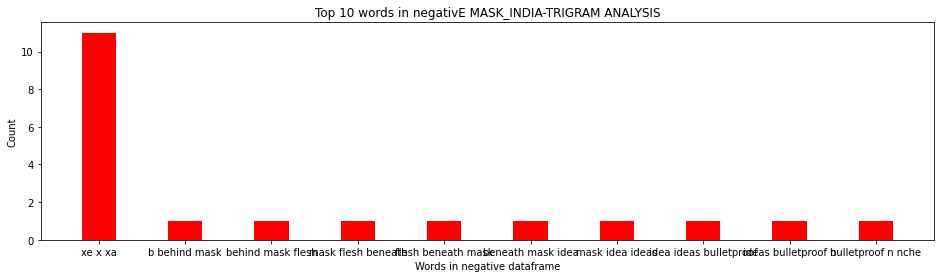

In [95]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negativE MASK_INDIA-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

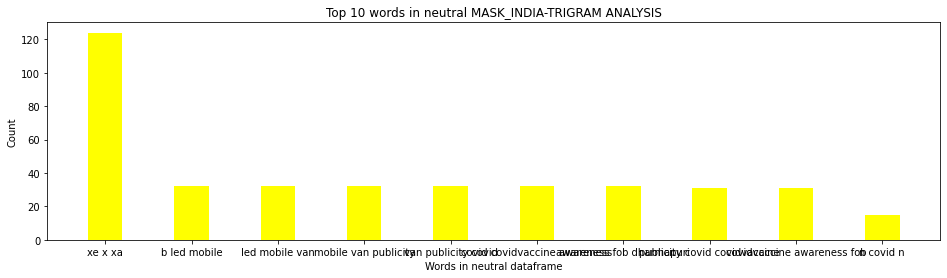

In [96]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral MASK_INDIA-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()